# Predicting the base energy of the Ising Model

In [6]:
import networkx as nx
import numpy as np

In [15]:
def random_spin_config(graph):
    """
    graph: networkx graph

    returns: a numpy array of length graph.number_of_nodes() with uniformly random sampled -1s & 1s
    """
    n = graph.number_of_nodes()
    spins = np.random.choice([1,-1], size=n)
    return spins

In [16]:
def total_energy(graph, spins, J=-1):
    """
    spins: numpy array of length graph.number_of_nodes()
    """
    E = 0
    for u, v in graph.edges:
        E += spins[u] * spins[v]
    return -J * E

In [17]:
def update_one(graph, spins, J=-1, beta=1):
    """
    graph: networkx graph
    spins: numpy array of length graph.number_of_nodes()

    Randomly choses a node and tries to flip its spin. The flip is either accepted or rejected.
    Returns the updated spins array.
    """
    u = np.random.randint(len(spins))
    E_start = 0
    E_end = 0
    for v in graph.adj[u]:
        E_start += spins[u] * spins[v]
        E_end -= spins[u] * spins[v] # flip the spin on u
    delta_E = -J * (E_end - E_start)

    if delta_E < 0:
        spins[u] *= -1
        return spins
    elif delta_E > 0 and np.random.random() <= np.e ** (-delta_E*beta):
        spins[u] *= -1
        return spins
    else:
        return spins

In [18]:
def update_many(graph, spins, num_iter, J=-1, beta=1):
    spins = random_spin_config()
    for i in range(num_iter):
        spins = update_one(p, spins, J, beta)
    return spins

In [19]:
# Example
p = nx.petersen_graph()
spins = random_spin_config(p)
print("Initial energy:", total_energy(p, spins))
spins = update_many(p, spins, 1000000)
print("Energy after 1000000 updates:", total_energy(p, spins))

Initial energy: 1
Energy after 1000000 updates: -9


In [20]:
def save_to_file(g_fname, nx_g_list, energy_list):
    energies = torch.tensor(energy_list, dtype=torch.float64) # convert eigens list into tensor
    dgl_g_list = list(map(dgl.DGLGraph, nx_g_list)) # convert to DGL graphs
    save_graphs(g_fname, dgl_g_list, {'energies': energies})

In [25]:
N_lower = 50
N_upper = 51

n = np.random.randint(N_lower, N_upper)
Mbound = n *(n-1) // 2 # complete graph
m = np.random.randint(1,Mbound)
g=nx.gnm_random_graph(n, m)

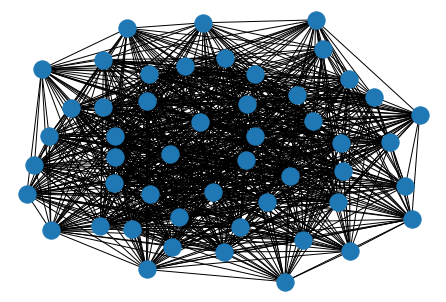

In [26]:
nx.draw(g)

In [30]:
print(g.number_of_nodes())
g_spins = random_spin_config(g)
print("Initial energy:", total_energy(g, g_spins))
g_spins = update_many(g, g_spins, 1000)
print(len(g_spins))
print("Energy after 1000 updates:", total_energy(g, g_spins))

50
Initial energy: -8
10


IndexError: index 29 is out of bounds for axis 0 with size 10